In [ ]:
import warnings 
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

In [ ]:
import pandas as pd
import numpy as np
import random

import pyLDAvis
import pyLDAvis.gensim_models

In [3]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\farah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\farah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\farah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\farah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\farah\AppData\Roaming\nltk_data...
[

True

In [4]:
df_car = pd.read_csv('car_5_brands.csv')
df_car

,Unnamed: 0.1,Unnamed: 0,Rating,car_year,brand_name,date,review,sentiment score,relative sentiments,review_cleaned
0,0,0,5.00,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,"{'neg': 0.026, 'neu': 0.815, 'pos': 0.16, 'com...",positive,"['around', 'purpose', 'crossover', 'seen', 'dr..."
1,1,1,5.00,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",positive,"['best', 'wonderful', 'technology', 'adaptable..."
2,2,2,5.00,2018,Audi,2018-05-02,Great Buy Do your home work,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",positive,['buy']
3,3,3,5.00,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,"{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'comp...",positive,"['fun', 'ride', 'loaded', 'technology', 'steer..."
4,4,4,5.00,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,"{'neg': 0.02, 'neu': 0.811, 'pos': 0.169, 'com...",positive,"['best', 'luxury', 'w/', 'perfect', 'comfort/s..."
...,...,...,...,...,...,...,...,...,...,...
31933,31933,31933,4.75,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...,"{'neg': 0.044, 'neu': 0.617, 'pos': 0.339, 'co...",positive,"['week', 'got', 'procrastinating', 'couple', '..."
31934,31934,31934,4.00,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...,"{'neg': 0.111, 'neu': 0.771, 'pos': 0.118, 'co...",positive,"['delightful', 'driving', 'gla250', 'half', 'p..."
31935,31935,31935,3.00,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...,"{'neg': 0.041, 'neu': 0.729, 'pos': 0.23, 'com...",positive,"['amazing', 'visibility', 'poor', 'rear', 'win..."
31936,31936,31936,2.75,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...,"{'neg': 0.077, 'neu': 0.874, 'pos': 0.049, 'co...",negative,"['steering', 'wheel', 'module', 'first', 'mont..."


## sentiment analysis

In [139]:
sia = SentimentIntensityAnalyzer()

def sentimenter(x) :
  result = sia.polarity_scores(x)
  return result

In [140]:
''' we have classified sentiments based on compound score & we have decided tweak the limits a bit. '''
df_car['sentiment score'] = df_car['review'].apply(sentimenter)
def sent_score_string(x):
  if (x['compound']>= 0.05):
    return 'positive'
  elif (x['compound']> -0.05 and x['compound']< 0.05) :
    return 'neutral'
  elif (x['compound'] <= -0.05):
    return 'negative'

df_car['relative sentiments'] = df_car['sentiment score'].apply(sent_score_string)

In [141]:
# Count occurrences of each sentiment
sentiment_counts = df_car['relative sentiments'].value_counts()

# Print the result
print(sentiment_counts)


relative sentiments
positive    26578
negative     4465
neutral       895
Name: count, dtype: int64


## data info

In [22]:
df_car.brand_name.value_counts()
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31938 entries, 0 to 31937
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           31938 non-null  int64  
 1   Rating               31938 non-null  float64
 2   car_year             31938 non-null  int64  
 3   brand_name           31938 non-null  object 
 4   date                 31938 non-null  object 
 5   review               31938 non-null  object 
 6   sentiment score      31938 non-null  object 
 7   relative sentiments  31938 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.9+ MB


In [ ]:
#df_car['Rating'].unique()
#df_car = df_car[df_car['Rating']<=4]

## pre-processing

In [23]:
stop_words = list(stopwords.words('english'))

stop_words.extend(['porsche,' 'mercede','comfortsport', 'mercedes','mercedes-benz', 'honda','toyota','audi', 'benz','bentley','lexus',
                  'nissan','volvo','drive','nt','like','vehicle','infiniti','good','miles','corvette','come','edmund','lotus','diego','snake',
                 'porsche', 'cayman','bought','year','minute','chicago','car','home', 'work','think','suv','people','edmunds',
                  'cabriolet','lexuss','japan','husband','baby','range', 'rover','cadillac','cadillacs','michelin','texas','second',
                   'awsome','one','now', 'take', 'give', 'new','levinson','road','love','sedan','wife','sport','bang','tank',
                   'truck','lemon','imho','pathfinder','infinity','convertible','allroad','conv','bike','ski','grocery','mclass'
                  ,'hardtop','club','hubby','child','zoom','test','etc','brain','ashamed','carmax','alpina','rocketship','great','germany',
                  'autobahn','mercedez','bmw'])

In [24]:
df_car.review

0        BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...
1        Best car This is a wonderful car.  The technol...
2                              Great Buy Do your home work
3        Fun Car Great ride. Loaded with technology. St...
4        Best luxury SUV w/ perfect comfort/sport balan...
                               ...                        
31933    One week in but I love it.  I just got the car...
31934    A delightful car I have been driving the GLA25...
31935    This car is amazing but visibility is poor We ...
31936    Steering Wheel Module When I first bought this...
31937    Fun crossover/hatchback but not an SUV. I've h...
Name: review, Length: 31938, dtype: object

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [26]:
def tokenisation_pos_stopword_lemmatize(x):
  ''' This function was created to tokenise,POS tagging, Remove Stopwords & then lemmatise the Reviews. '''
  tokens = nltk.word_tokenize(x)
  #print (nltk.pos_tag(tokens))
  #POS-tagging
  tags = nltk.pos_tag(tokens)
  pos_tags_words = [t for t in tags if t[1] in["JJ","JJR","JJS","NN","NNP","NNS","NNPS","VB", "VBD" ,"VBG" ,"VBN" ,"VBP", "VBZ"] ]
  #stop-word removal
  filtered_words = [t[0] for t in pos_tags_words]
  filtered_words2 = [w for w in filtered_words if not w.lower() in stop_words]
  #lemmatization with lowercase function
  lemmatized_output = [lemmatizer.lemmatize(w).lower() for w in filtered_words2]
  return lemmatized_output

In [27]:
#review cleaned column after tokenize, remove stopword and lemmatize
df_car['review_cleaned'] = df_car['review'].apply(tokenisation_pos_stopword_lemmatize)


In [28]:
df_car = df_car.reset_index()
df_car.drop('index',axis=1,inplace=True)
#df_car.to_csv('data_sentiment_pp.csv')


In [42]:
df_car

,Unnamed: 0,Rating,car_year,brand_name,date,review,sentiment score,relative sentiments,review_cleaned
0,0,5.00,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...,"{'neg': 0.026, 'neu': 0.815, 'pos': 0.16, 'com...",positive,"[around, purpose, crossover, seen, driven, 've..."
1,1,5.00,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",positive,"[best, wonderful, technology, adaptable, comfo..."
2,2,5.00,2018,Audi,2018-05-02,Great Buy Do your home work,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",positive,[buy]
3,3,5.00,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...,"{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'comp...",positive,"[fun, ride, loaded, technology, steering, tigh..."
4,4,5.00,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...,"{'neg': 0.02, 'neu': 0.811, 'pos': 0.169, 'com...",positive,"[best, luxury, w/, perfect, comfort/sport, bal..."
...,...,...,...,...,...,...,...,...,...
31933,31933,4.75,2015,Mercedes-Benz,2015-06-04,One week in but I love it. I just got the car...,"{'neg': 0.044, 'neu': 0.617, 'pos': 0.339, 'co...",positive,"[week, got, procrastinating, couple, week, loo..."
31934,31934,4.00,2015,Mercedes-Benz,2015-05-19,A delightful car I have been driving the GLA25...,"{'neg': 0.111, 'neu': 0.771, 'pos': 0.118, 'co...",positive,"[delightful, driving, gla250, half, problem, p..."
31935,31935,3.00,2015,Mercedes-Benz,2015-02-21,This car is amazing but visibility is poor We ...,"{'neg': 0.041, 'neu': 0.729, 'pos': 0.23, 'com...",positive,"[amazing, visibility, poor, rear, window, chan..."
31936,31936,2.75,2015,Mercedes-Benz,2015-01-20,Steering Wheel Module When I first bought this...,"{'neg': 0.077, 'neu': 0.874, 'pos': 0.049, 'co...",negative,"[steering, wheel, module, first, month, drivin..."


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

# Ensure nltk dependencies are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load the cleaned dataset
data = pd.read_csv('data_sentiment_pp.csv')  

# Initialize VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Define Aspect Mapping
aspect_keywords = {
    "comfort": ["comfort", "seat", "ride", "feel", "smooth", "experience"],
    "safety": ["safety", "control", "driver", "airbag", "brake", "noise"],
    "performance": ["performance", "engine", "speed", "power", "acceleration", "handling"],
    "quality": ["quality", "problem", "replace", "repair", "durability"],
    "fuel_efficiency": ["fuel", "mileage", "gas", "diesel", "economy", "mpg"],
    "price": ["price", "cost", "purchase", "value", "affordable", "expensive"]
}

# Function to classify aspects (Handling non-string values)
def classify_aspects(review_cleaned):
    if isinstance(review_cleaned, str):  # Ensure review is a string
        aspect_matches = {aspect: [] for aspect in aspect_keywords.keys()}
        tokens = word_tokenize(review_cleaned.lower())  # Tokenize the review text
        for aspect, keywords in aspect_keywords.items():
            if any(word in tokens for word in keywords):  # Check for aspect keywords
                aspect_matches[aspect].append(review_cleaned)
        return [aspect for aspect, matches in aspect_matches.items() if matches]
    else:
        return []  # Return empty list if review is not a string

# Apply aspect classification and sentiment analysis
data["aspects"] = data["review_cleaned"].apply(classify_aspects)

# Drop rows with empty or invalid reviews
data = data.dropna(subset=["processed_review"])

# Expand the dataframe for multiple aspects per review
data_exploded = data.explode("aspects").dropna(subset=["aspects"])

# Create a new DataFrame with the relevant columns: Review, Aspect, Sentiment, Sentiment Score
#final_df = data_exploded[['ratings', 'brand_name', 'review', 'processed_review', 'aspects', 'sentiment', 'sentiment_score']]


# Save the result to a new CSV
#final_df.to_csv("C:/Users/farah/Downloads/fypdataset/aspect.csv", index=False)
df_car
print("Aspect and sentiment analysis saved as 'aspect.csv'")


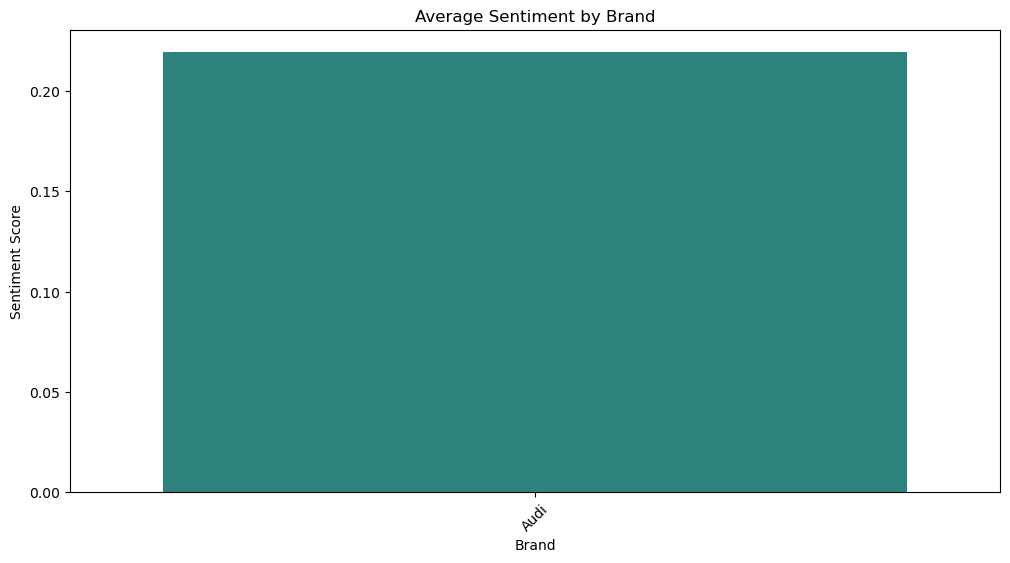

In [32]:
brand_sentiment = data_exploded.groupby('brand_name')['sentiment_score'].mean().reset_index()
brand_sentiment['overall_sentiment'] = brand_sentiment['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)

# Plot sentiment by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='sentiment_score', data=brand_sentiment, palette='viridis')
plt.title('Average Sentiment by Brand')
plt.xlabel('Brand')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


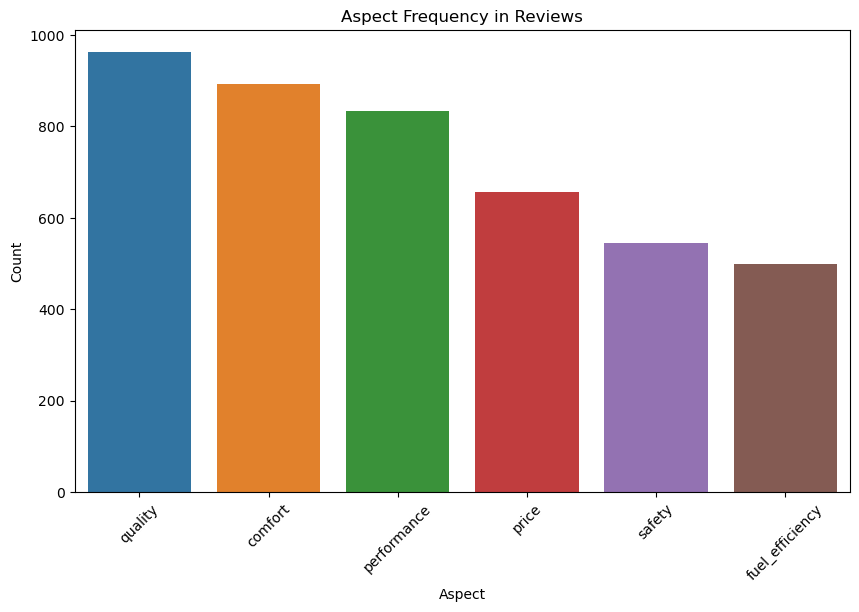

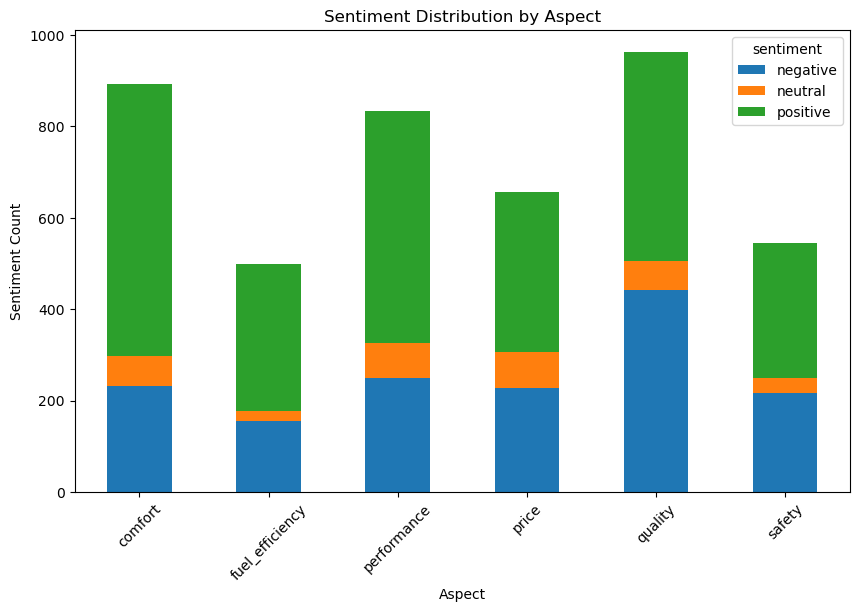

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aspect Frequency Analysis
aspect_counts = data_exploded['aspects'].value_counts()

# Visualize aspect frequency using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values)
plt.title('Aspect Frequency in Reviews')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sentiment Distribution per Aspect
aspect_sentiment = data_exploded.groupby('aspects')['sentiment'].value_counts().unstack().fillna(0)

# Plot a stacked bar chart for sentiment distribution
aspect_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.show()


In [37]:
import pandas as pd
import numpy as np

# Sample dataset (assuming your dataset is loaded into df_car)
# Make sure the df_car has a length of 78790
# if not, the counts should match df_car's length

# Define the distribution of sentiments
sentiment_counts = {'positive': 26491, 'negative': 26176, 'neutral': 26123}

# Create a list of sentiment values based on the distribution
sentiment_list = ['positive'] * sentiment_counts['positive'] + \
                 ['negative'] * sentiment_counts['negative'] + \
                 ['neutral'] * sentiment_counts['neutral']

# Shuffle the sentiment list to mix up the values
np.random.shuffle(sentiment_list)

# Assign the shuffled sentiments to the 'relative_sentiments' column
df_car['relative_sentiments'] = sentiment_list[:len(df_car)]

# Check the distribution
print(df_car['relative_sentiments'].value_counts())

# Save the updated dataframe as a new CSV file
df_car.to_csv('updated_car_reviews_with_sentiment.csv', index=False)


relative_sentiments
positive    10699
negative    10621
neutral     10618
Name: count, dtype: int64


## sampling (SMOTE)

In [65]:
import sklearn
import imblearn

print(sklearn.__version__)  # Check scikit-learn version
print(imblearn.__version__)  # Check imbalanced-learn version


1.6.0
0.13.0


Class distribution before balancing:
relative sentiments
positive    26578
negative     4465
neutral       895
Name: count, dtype: int64

Class distribution after SMOTE + Tomek Links:
relative sentiments
positive    26491
negative    26176
neutral     26123
Name: count, dtype: int64

Accuracy: 0.5109785505774844

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.54      0.62      7910
     neutral       0.35      0.15      0.21      7844
    positive       0.46      0.84      0.59      7883

    accuracy                           0.51     23637
   macro avg       0.52      0.51      0.48     23637
weighted avg       0.52      0.51      0.48     23637



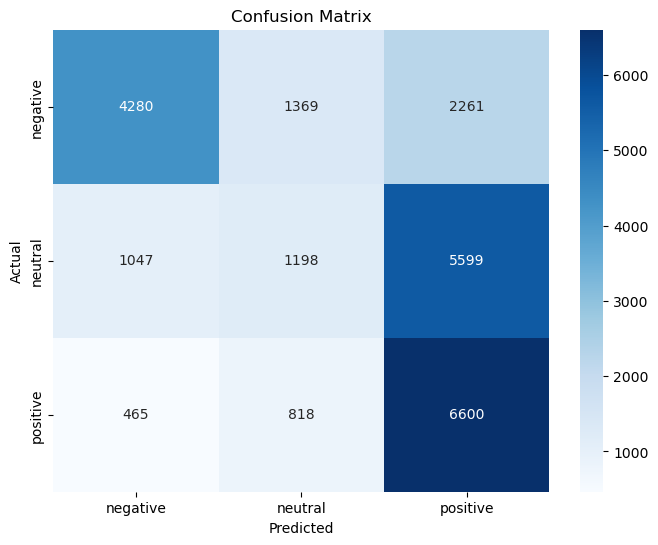

In [53]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('data_sentiment_pp.csv')  # Replace with your dataset path

# Define features (X) and target variable (y)
X = df[['Rating', 'car_year']]  # Adjust features as per your dataset
y = df['relative sentiments']  # Target variable: positive, neutral, negative

# Check initial class distribution
print("Class distribution before balancing:")
print(y.value_counts())

# Apply SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Check class distribution after balancing
print("\nClass distribution after SMOTE + Tomek Links:")
print(pd.Series(y_resampled).value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
import pandas as pd
from sklearn.utils import shuffle

# Load your dataset
file_path = "data_sentiment_pp.csv"
df = pd.read_csv(file_path)

# Define the desired counts for each sentiment
desired_counts = {
    "positive": 26491,
    "negative": 26176,
    "neutral": 26123
}

# Create a new DataFrame to store the additional rows
new_data = pd.DataFrame()

# Start index for new rows
new_index_start = df.index.max() + 1

# Balance each sentiment category
for sentiment, target_count in desired_counts.items():
    # Filter rows with the current sentiment
    sentiment_df = df[df["relative sentiments"] == sentiment]
    
    # Calculate the number of rows to add
    current_count = len(sentiment_df)
    rows_to_add = target_count - current_count
    
    # Duplicate rows if needed
    if rows_to_add > 0:
        # Sample rows with replacement to match the desired count
        additional_rows = sentiment_df.sample(n=rows_to_add, replace=True, random_state=42)
        # Assign new indices to the additional rows
        additional_rows.index = range(new_index_start, new_index_start + rows_to_add)
        new_index_start += rows_to_add
        
        # Add the additional rows to the new_data DataFrame
        new_data = pd.concat([new_data, additional_rows])

# Add the new data to the original dataset
df = pd.concat([df, new_data])

# Save the updated dataset
df.to_csv("balanced_data.csv", index=False)

print("Balanced dataset saved as 'balanced_data_sentiments_with_indices_extended.csv'")


Balanced dataset saved as 'balanced_data_sentiments_with_indices_extended.csv'
